#######################################################################
## eSEESminiPy


#                          USGS Design Map App
## R210525

###   developed by Silvia Mazzoni, 2021
###      silviamazzoni@yahoo.com


#######################################################################


### INSTRUCTIONS

This tool accesses the USGS WebServices tool (https://earthquake.usgs.gov/ws/designmaps/) and processes the data into usable and consistent format for all design codes.
NOTE: Some plots may appear jagged because of the low number of sig-figs provided by USGS.


This is a Jupyter Notebook<br>
Each cell can be executed individually using the Cell>Run Cells in the menu above.<br>
<br>
To run the Notebook, work through each cell in the order provided in this notebook and modify the input for your case<br>
To run this notebook select: Cell>Run All   from the menu "<br>

When you are done, you can print the notebook.
You can also download the notebook to your local computer.

You may download this notebook. but I recommend you keep using the on-line version as I will be making updates and modifications. To save the data, print this notebook to a PDF.

Because we are working in Binder, and Binder sessions are meant to be ephemeral, it is not possible for you to save any changes you make to your Jupyter Notebook. If you do make changes or notes, you will need to download the notebook to your own computer by clicking File > Download as > Notebook (.ipynb). The only way you will be able to run these is if you have the appropriate software to run Jupyter Notebooks in Python and pip install OpenSeesPy and eSEESminiPy in your Python configuration. You may view my videos on how to install Anaconda, Jupyter Notebooks and OpenSeesPy (https://www.youtube.com/c/silviasbrainery).

In [14]:
#######################################################################
############## user input 
#######################################################################

label = 'USGS Test Site'
Latitude = 34
Longitude = -118
SiteClass = 'C' # options: ['A', 'B', 'C', 'D', 'E'] or NEHRP-2020: ['A', 'B', 'BC', 'C', 'CD', 'D', 'DE', 'E']
RiskCat = 'IV' # options: ['I', 'II', 'III', 'IV']
# Select governing code:
ASCEcode = ['ASCE41-17'] # options: ASCE7-16,ASCE7-10,ASCE7-05,ASCE41-17,ASCE41-13,NEHRP-2020,NEHRP-2015,IBC-2015,IBC-2012,AASHTO-2009
# or you can define them all:
ASCEcode = ['ASCE7-16','ASCE7-10','ASCE7-05','ASCE41-17','ASCE41-13','NEHRP-2020','NEHRP-2015','IBC-2015','IBC-2012','AASHTO-2009']

# output:
printSpectraValues = False     # options: True, False
Period_scale='linear'   # options: 'log','linear'
PSA_scale='linear'   # options: 'log','linear'
#######################################################################
#######################################################################

In [15]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 10000;

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt
import eSEESminiPy
import glob
import urllib
import webbrowser
from ipywidgets import widgets, Output

HTML(value='<font color="#D47088"><h3>ASCE7-16</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:41.111Z
referenceDocument: ASCE7-16
status: success
url: https://earthquake.usgs.gov/ws/designmaps/asce7-16.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgauh: 0.819
pgad: 1.021
pga: 0.819
fpga: 1.2
pgam: 0.983
ssrt: 1.888
crs: 0.896
ssuh: 2.106
ssd: 2.432
ss: 1.888
fa: 1.2
sms: 2.265
sds: 1.51
sdcs: D
s1rt: 0.669
cr1: 0.9
s1uh: 0.743
s1d: 0.963
s1: 0.669
ts: 0.413
t0: 0.0827
fv: 1.4
sm1: 0.936
sd1: 0.624
sdc1: D
sdc: D
tl: 8
t-sub-l: 8
cv: 1.278


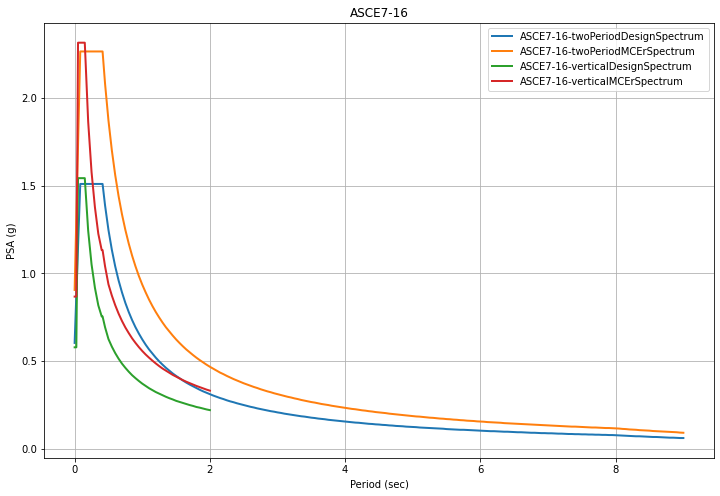

HTML(value='<font color="#D47088"><h3>ASCE7-10</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:42.798Z
referenceDocument: ASCE7-10
status: success
url: https://earthquake.usgs.gov/ws/designmaps/asce7-10.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgauh: 0.894
pgad: 1.02
pga: 0.894
fpga: 1
pgam: 0.894
ssrt: 2.308
crs: 0.925
ssuh: 2.494
ssd: 2.73
ss: 2.308
fa: 1
sms: 2.308
sds: 1.538
sdcs: 
s1rt: 0.825
cr1: 0.94
s1uh: 0.878
s1d: 1.004
s1: 0.825
fv: 1.3
sm1: 1.072
sd1: 0.715
sdc1: 
sdc: F
tl: 8
t-sub-l: 8


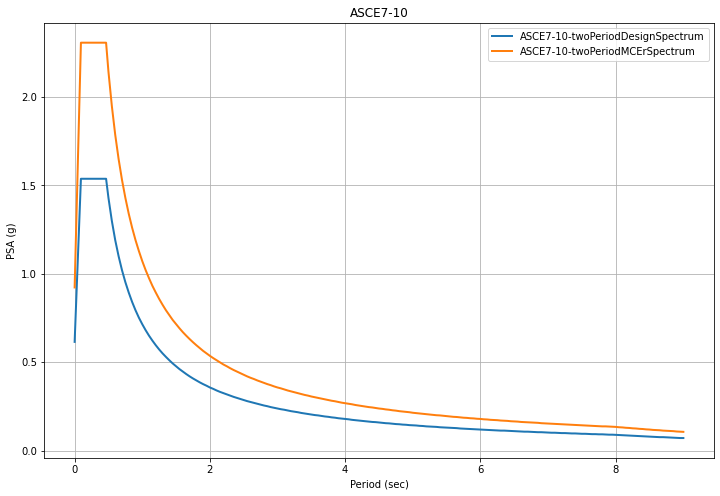

HTML(value='<font color="#D47088"><h3>ASCE7-05</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:44.327Z
referenceDocument: ASCE7-05
status: success
url: https://earthquake.usgs.gov/ws/designmaps/asce7-05.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
ss: 2.123
fa: 1
sms: 2.123
sds: 1.415
sdcs: 
s1: 0.784
fv: 1.3
sm1: 1.019
sd1: 0.679
sdc1: 
sdc: F
tl: 8
t-sub-l: 8


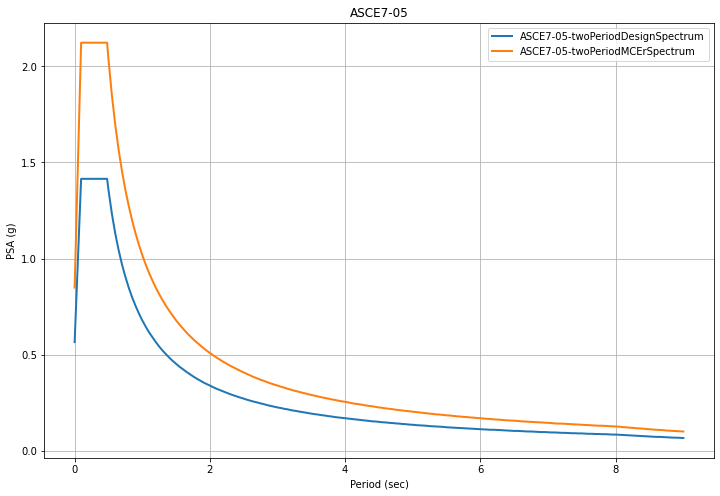

HTML(value='<font color="#D47088"><h3>ASCE41-17</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:25.752Z
referenceDocument: ASCE41-17
status: success
url: https://earthquake.usgs.gov/ws/designmaps/asce41-17.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
hazardLevel: TL Data
ssuh: 2.106
crs: 0.896
ssrt: 1.888
ssd: 2.432
ss: 0.645
fa: 1.242
sxs: 0.801
s1uh: 0.743
cr1: 0.9
s1rt: 0.669
s1d: 0.963
s1: 0.219
fv: 1.5
sx1: 0.329
tl: 8
t-sub-l: 8


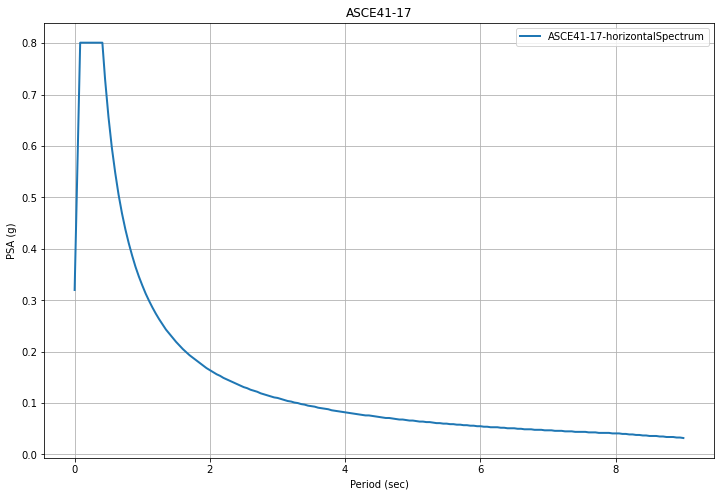

HTML(value='<font color="#D47088"><h3>ASCE41-13</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:51.144Z
referenceDocument: ASCE41-13
status: success
url: https://earthquake.usgs.gov/ws/designmaps/asce41-13.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
hazardLevel: TL Data
ssuh: 2.494
crs: 0.925
ssrt: 2.308
ssd: 2.73
ss: 0.788
fa: 1.085
sxs: 0.855
s1uh: 0.878
cr1: 0.94
s1rt: 0.825
s1d: 1.004
s1: 0.284
fv: 1.516
sx1: 0.43
tl: 8
t-sub-l: 8


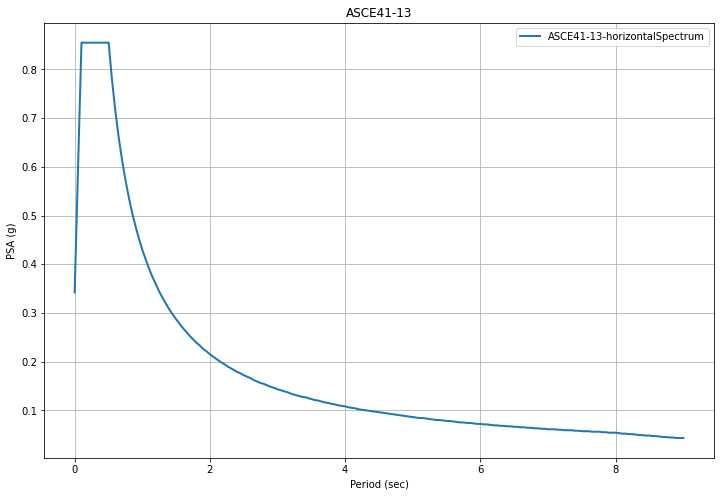

HTML(value='<font color="#D47088"><h3>NEHRP-2020</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:51.856Z
referenceDocument: NEHRP-2020
status: success
url: https://earthquake.usgs.gov/ws/designmaps/nehrp-2020.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgam: 0.9
sms: 2.19
sm1: 1.05
sds: 1.46
sd1: 0.7
sdc: D
ss: 2.15
s1: 0.75
ts: 0.479
t0: 0.0958
tl: 8
cv: None
underlyingData: {'pgauh': 0.9, 'pga84th': 0.97}


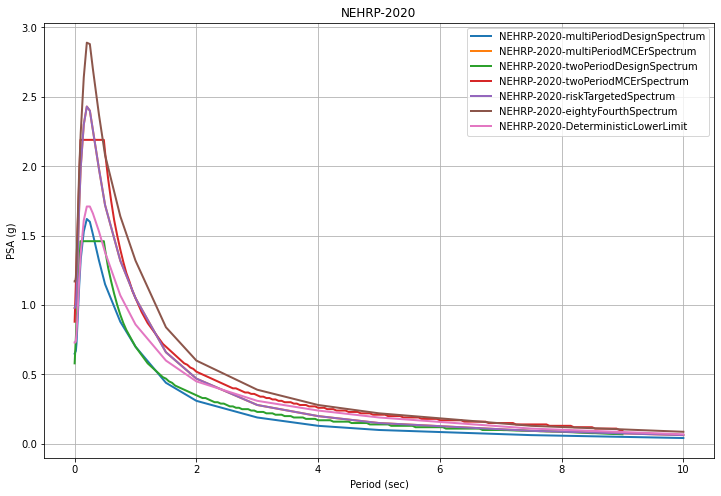

HTML(value='<font color="#D47088"><h3>NEHRP-2015</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:52.542Z
referenceDocument: NEHRP-2015
status: success
url: https://earthquake.usgs.gov/ws/designmaps/nehrp-2015.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgauh: 0.819
pgad: 1.021
pga: 0.819
fpga: 1.2
pgam: 0.983
ssrt: 1.888
crs: 0.896
ssuh: 2.106
ssd: 2.432
ss: 1.888
fa: 1.2
sms: 2.265
sds: 1.51
sdcs: D
s1rt: 0.669
cr1: 0.9
s1uh: 0.743
s1d: 0.963
s1: 0.669
ts: 0.413
t0: 0.0827
fv: 1.4
sm1: 0.936
sd1: 0.624
sdc1: D
sdc: D
tl: 8
t-sub-l: 8
cv: 1.278


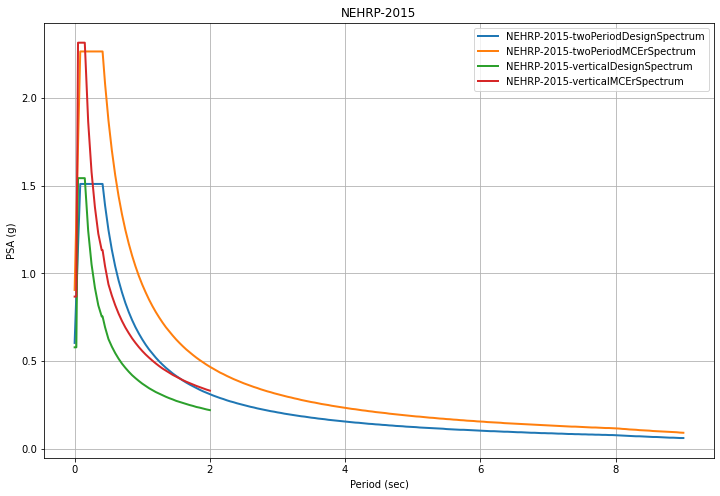

HTML(value='<font color="#D47088"><h3>IBC-2015</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:53.258Z
referenceDocument: IBC-2015
status: success
url: https://earthquake.usgs.gov/ws/designmaps/ibc-2015.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgauh: 0.894
pgad: 1.02
pga: 0.894
fpga: 1
pgam: 0.894
ssrt: 2.308
crs: 0.925
ssuh: 2.494
ssd: 2.73
ss: 2.308
fa: 1
sms: 2.308
sds: 1.538
sdcs: 
s1rt: 0.825
cr1: 0.94
s1uh: 0.878
s1d: 1.004
s1: 0.825
fv: 1.3
sm1: 1.072
sd1: 0.715
sdc1: 
sdc: F
tl: 8
t-sub-l: 8


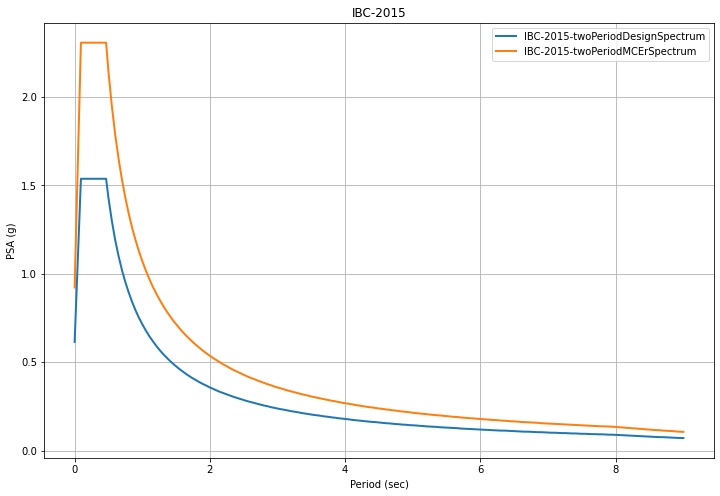

HTML(value='<font color="#D47088"><h3>IBC-2012</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:53.957Z
referenceDocument: IBC-2012
status: success
url: https://earthquake.usgs.gov/ws/designmaps/ibc-2012.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pgauh: 0.894
pgad: 1.02
pga: 0.894
fpga: 1
pgam: 0.894
ssrt: 2.308
crs: 0.925
ssuh: 2.494
ssd: 2.73
ss: 2.308
fa: 1
sms: 2.308
sds: 1.538
sdcs: 
s1rt: 0.825
cr1: 0.94
s1uh: 0.878
s1d: 1.004
s1: 0.825
fv: 1.3
sm1: 1.072
sd1: 0.715
sdc1: 
sdc: F
tl: 8
t-sub-l: 8


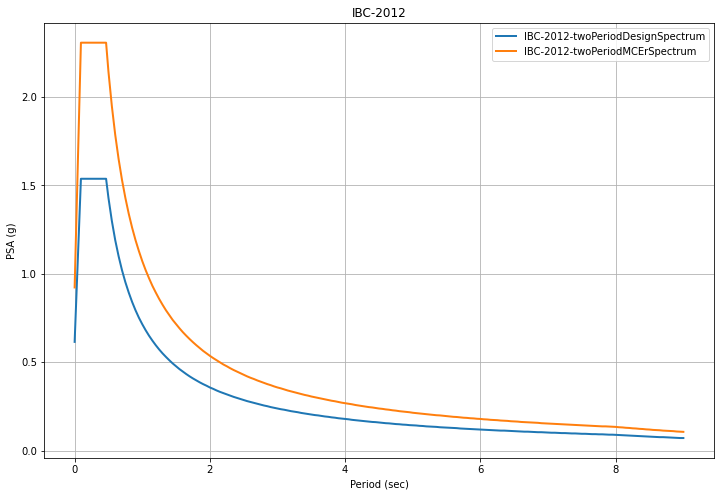

HTML(value='<font color="#D47088"><h3>AASHTO-2009</h3></font>')


WEBSERVICES REQUEST DATA
date: 2021-05-25T17:56:54.789Z
referenceDocument: AASHTO-2009
status: success
url: https://earthquake.usgs.gov/ws/designmaps/aashto-2009.json?latitude=34&longitude=-118&riskCategory=IV&siteClass=C&title=USGS Test Site
parameters: {'latitude': 34, 'longitude': -118, 'riskCategory': 'IV', 'siteClass': 'C', 'title': 'USGS Test Site'}

GROUND MOTION DATA
pga: 0.637
fpga: 1
as: 0.637
ss: 1.512
fa: 1
sds: 1.512
s1: 0.551
fv: 1.3
sd1: 0.716
sdc: D
ts: 0.474
t0: 0.095


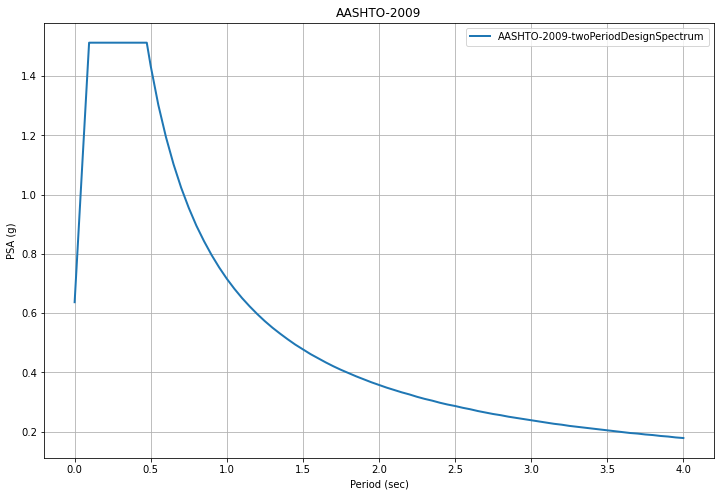

In [17]:
for ASCEcode in ASCEcode:
    thisWidget = widgets.HTML(value = """<font color="#D47088"><h3>""" + ASCEcode + """</h3></font>""")
    display(thisWidget)
    thisOut = eSEESminiPy.getUSGSdesignGroundMotion(label,ASCEcode,Latitude,Longitude,SiteClass,RiskCat)
    UserInput = thisOut['UserInput']
    RequestData = thisOut['Request']
    Data = thisOut['Data']
    spectraData = thisOut['Spectra']
    #print('')
    #print('USER INPUT')
    #for thisLabel in UserInput.keys():
    #    print(thisLabel + ': ' + str(UserInput[thisLabel]))
    print('')
    print('WEBSERVICES REQUEST DATA')
    for thisLabel in RequestData.keys():
        print(thisLabel + ': ' + str(RequestData[thisLabel]))
    print('')
    print('GROUND MOTION DATA')
    for thisLabel in Data.keys():
        print(thisLabel + ': ' + str(Data[thisLabel]))
    plt.figure(figsize=(12,8))
    for SpectrumLabel in spectraData.keys():
        if len(spectraData[SpectrumLabel])>0:
            plt.plot(spectraData[SpectrumLabel]['Period (sec)'], spectraData[SpectrumLabel]['PSA (g)'],lineWidth = 2, label=ASCEcode + '-' + SpectrumLabel)
            if printSpectraValues:
                print(SpectrumLabel)
                print(spectraData[SpectrumLabel])

    plt.xlabel('Period (sec)')
    plt.ylabel('PSA (g)')
    plt.xscale(Period_scale)
    plt.yscale(PSA_scale)
    plt.title(ASCEcode)
    plt.legend()
    plt.grid()
    plt.show()



In [18]:
### Questions?
#### Contact Silvia Mazzoni: silviamazzoni@yahoo.com


## copyright: 
##   You may use this code to run your analyses. 
##   You may print and distribute the results
##    This tool comes as-is with no warranty and I recommend you check the results
## 
##   NO PART OF THIS CODE MAY BE REPRODUCED OR REDISTRIBUTED WITHOUT PRIOR WRITTEN CONSENT FROM THE AUTHOR